# This notebook adds erics data to our tree dataset 
- we add the data
- we make sure we did it correctly
- we plot relationships

In [1]:
#import packages
from shapely.geometry import shape
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
from shapely.geometry.point import Point
import rioxarray as rxr
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import os
import requests
import matplotlib.ticker as ticker
from rasterio.enums import Resampling
from affine import Affine
import shapely.geometry
import pyproj
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
import time
from itertools import combinations
import plotly.express as px
import pandas as pd
import rasterio
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import geopandas as gpd
import rioxarray

#! pip install h5netcdf
import h5netcdf

/opt/anaconda3/envs/python-starter/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
#import the tree dataset 
tree_fxn = "Tree_ds_sep16.csv"

tree= pd.read_csv(tree_fxn)

mygeometry_array = gpd.points_from_xy(tree['Longitude'], tree['Latitude'])

tree= gpd.GeoDataFrame(
tree, crs='EPSG:4326', geometry=mygeometry_array)

tree.head()

,tree_id,Region,Latitude,Longitude,geometry,Species,Date collected,Type of sample,Height of sample,Diameter of tree at sample location (inches),...,4_tmin_nClimGrid,5_tmin_nClimGrid,6_tmin_nClimGrid,7_tmin_nClimGrid,8_tmin_nClimGrid,9_tmin_nClimGrid,10_tmin_nClimGrid,11_tmin_nClimGrid,12_tmin_nClimGrid,annual_tmin_nClimGrid
0,0,Ohio,41.486318,-81.934554,POINT (-81.93455 41.48632),rubra,01/07/17,disk,NaN,27.5,...,4.721354,11.013965,16.492676,19.165266,18.392643,14.586589,8.672624,2.884961,-1.714681,6.962891
1,1,Michigan,42.667700,-85.449200,POINT (-85.4492 42.6677),sp.,05/03/19,disk,NaN,9.0,...,2.039616,8.190105,13.523373,15.648698,14.951367,10.567318,4.909961,-0.368978,-4.949381,3.741542
2,2,Pennsylvania,40.573010,-75.339340,POINT (-75.33934 40.57301),alba,16/01/19,disk,NaN,9.0,...,3.583561,9.132389,14.309050,17.111622,16.050976,12.029753,5.415690,0.469401,-3.621094,5.051194
3,3,Pennsylvania,41.195420,-75.856400,POINT (-75.8564 41.19542),alba,19/01/19,disk,NaN,8.0,...,0.993945,7.130957,11.748763,14.286361,13.614323,9.920410,3.801302,-1.403646,-5.992969,2.602510
4,4,Michigan,44.560850,-84.608510,POINT (-84.60851 44.56085),alba,20/03/19,disk,1.0,14.0,...,-1.175651,4.913672,10.602083,12.727995,12.056608,7.842708,2.612760,-2.448600,-7.438184,0.787554


In [3]:
!pwd

/Users/amandaworthy/Isotopes_w_keenan/isotopes/Amanda


In [4]:
!ls /Users/amandaworthy/Isotopes_w_keenan/

Not pushed yet   d18OdDmonthly.nc isotopes


In [5]:
ds = xr.open_dataset("/Users/amandaworthy/Isotopes_w_keenan/d18OdDmonthly.nc", engine= 'h5netcdf') 


#convert to lat and lon using 
# https://github.com/corteva/rioxarray/discussions/445
ds = ds.assign_coords(long=(((ds.long + 180) % 360) - 180)).sortby('long')

ds

<xarray.Dataset> Size: 80MB
Dimensions:      (lat: 96, long: 144, month: 360)
Coordinates:
  * lat          (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * long         (long) float64 1kB -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
Dimensions without coordinates: month
Data variables:
    d18O         (lat, long) float64 111kB ...
    dD           (lat, long) float64 111kB ...
    dDmonthly    (month, lat, long) float64 40MB ...
    d18Omonthly  (month, lat, long) float64 40MB ...

In [6]:
#print(ds['month'].values)

#ds_mean = ds.mean(dim='month')

#ds_mean

In [7]:
tree.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

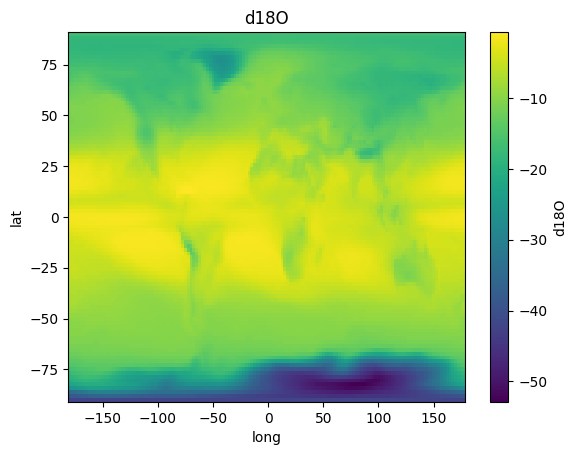

In [8]:
ds['d18O'].plot()
plt.title("d18O")
plt.show()

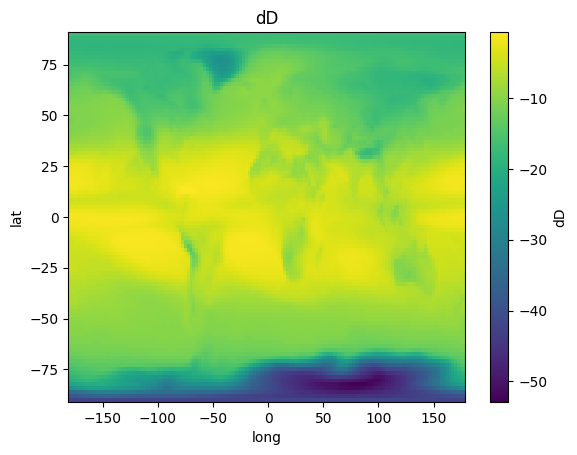

In [9]:
ds['dD'].plot()
plt.title("dD")
plt.show()

In [11]:
#sample at the tree dataset locations

tree['d18O_climate_model_precipitation'] = ds['d18O'].sel(
            long=xr.DataArray(tree["Longitude"], dims="points"),
            lat=xr.DataArray(tree["Latitude"], dims="points"),
            method="nearest"
        ).values


tree['dD_climate_model_precipitation'] = ds['dD'].sel(
            long=xr.DataArray(tree["Longitude"], dims="points"),
            lat=xr.DataArray(tree["Latitude"], dims="points"),
            method="nearest"
        ).values



#tree['d18O_eric_monthly_mean'] = ds['d18Omonthly'].mean(dim='month').sel(
#            long=xr.DataArray(tree["Longitude"], dims="points"),
#            lat=xr.DataArray(tree["Latitude"], dims="points"),
#            method="nearest"
#        ).values



In [12]:
tree.head()

,tree_id,Region,Latitude,Longitude,geometry,Species,Date collected,Type of sample,Height of sample,Diameter of tree at sample location (inches),...,6_tmin_nClimGrid,7_tmin_nClimGrid,8_tmin_nClimGrid,9_tmin_nClimGrid,10_tmin_nClimGrid,11_tmin_nClimGrid,12_tmin_nClimGrid,annual_tmin_nClimGrid,d18O_climate_model_precipitation,dD_climate_model_precipitation
0,0,Ohio,41.486318,-81.934554,POINT (-81.93455 41.48632),rubra,01/07/17,disk,NaN,27.5,...,16.492676,19.165266,18.392643,14.586589,8.672624,2.884961,-1.714681,6.962891,-9.848774,-9.848774
1,1,Michigan,42.667700,-85.449200,POINT (-85.4492 42.6677),sp.,05/03/19,disk,NaN,9.0,...,13.523373,15.648698,14.951367,10.567318,4.909961,-0.368978,-4.949381,3.741542,-10.380209,-10.380209
2,2,Pennsylvania,40.573010,-75.339340,POINT (-75.33934 40.57301),alba,16/01/19,disk,NaN,9.0,...,14.309050,17.111622,16.050976,12.029753,5.415690,0.469401,-3.621094,5.051194,-9.501338,-9.501338
3,3,Pennsylvania,41.195420,-75.856400,POINT (-75.8564 41.19542),alba,19/01/19,disk,NaN,8.0,...,11.748763,14.286361,13.614323,9.920410,3.801302,-1.403646,-5.992969,2.602510,-9.501338,-9.501338
4,4,Michigan,44.560850,-84.608510,POINT (-84.60851 44.56085),alba,20/03/19,disk,1.0,14.0,...,10.602083,12.727995,12.056608,7.842708,2.612760,-2.448600,-7.438184,0.787554,-11.484205,-11.484205


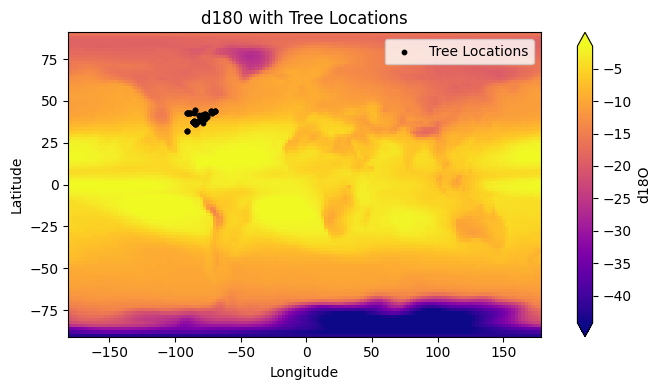

In [14]:
#double check 

fig, ax = plt.subplots(figsize=(8, 4))

# Plot raster on this axis
ds['d18O'].plot(
    x='long', y='lat',
    cmap='plasma',
    robust=True, #vmin=30, vmax=150,
    ax=ax
)


tree = tree.to_crs("EPSG:4326")

# Plot tree points on the same axis
tree.plot(ax=ax, 
          #column = 'd18O_eric',
          markersize=10, marker='o', 
          label='Tree Locations', 
          #cmap='plasma', legend= True, 
          #vmin=30, vmax=150,
      edgecolor='black', 
    color= 'black' 
           )

# Labels and legend
ax.set_title(f"d180 with Tree Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
#ax.set_xlim(-95, -30)  
#ax.set_ylim(30, 45)  

#ax.set_xlim(-115, -10)  
#ax.set_ylim(10, 50) 


ax.legend()

plt.tight_layout()
plt.show()


In [209]:
#list(tree.columns)

In [16]:
#isotopes 
isotopes = ['d18O', 'd2H', 'd13C', 'd34S']

#variables of interest 
eric_predictors = [ 'd18O_climate_model_precipitation',
 'dD_climate_model_precipitation'
    
]
      
#compute r2 
results = []

for iso in isotopes:
    for var in eric_predictors:
        df_pair = tree[[var, iso]].dropna()
        ds_length = df_pair.shape[0]

        X = df_pair[[var]].values
        y = df_pair[iso].values

        model = LinearRegression().fit(X, y)
        r2 = r2_score(y, model.predict(X))

        results.append({
            'Isotope': iso,
            'Variable': var,
            'R2': r2,
            'ds_length': ds_length # to ensure we are comparing apples to apples (and the dataset lengths are similar)
        })

#make table 
r2_table_eric = pd.DataFrame(results) \
    .sort_values(['Isotope', 'R2'], ascending=[True, False]) \
    .reset_index(drop=True)

r2_table_eric.head()

r2_table_eric_sorted = r2_table_eric.sort_values(by='R2', ascending=False).reset_index(drop=True)

r2_table_eric_sorted.head(10)

,Isotope,Variable,R2,ds_length
0,d2H,d18O_climate_model_precipitation,0.556024,78
1,d2H,dD_climate_model_precipitation,0.556024,78
2,d18O,d18O_climate_model_precipitation,0.547045,78
3,d18O,dD_climate_model_precipitation,0.547045,78
4,d13C,d18O_climate_model_precipitation,0.215400,78
5,d13C,dD_climate_model_precipitation,0.215400,78
6,d34S,d18O_climate_model_precipitation,0.074786,78
7,d34S,dD_climate_model_precipitation,0.074786,78


In [17]:
#look at top 10 for climate normals 

top_r2_table_eric = (
    r2_table_eric_sorted
    .sort_values(['Isotope', 'R2'], ascending=[True, False])
   .groupby('Isotope')
    .head(10)
   .reset_index(drop=True)
)

top_r2_table_eric.head()



,Isotope,Variable,R2,ds_length
0,d13C,d18O_climate_model_precipitation,0.215400,78
1,d13C,dD_climate_model_precipitation,0.215400,78
2,d18O,d18O_climate_model_precipitation,0.547045,78
3,d18O,dD_climate_model_precipitation,0.547045,78
4,d2H,d18O_climate_model_precipitation,0.556024,78


/var/folders/yw/51w3wvb97794y1f596f8yf440000gn/T/ipykernel_38817/2102252065.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/yw/51w3wvb97794y1f596f8yf440000gn/T/ipykernel_38817/2102252065.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


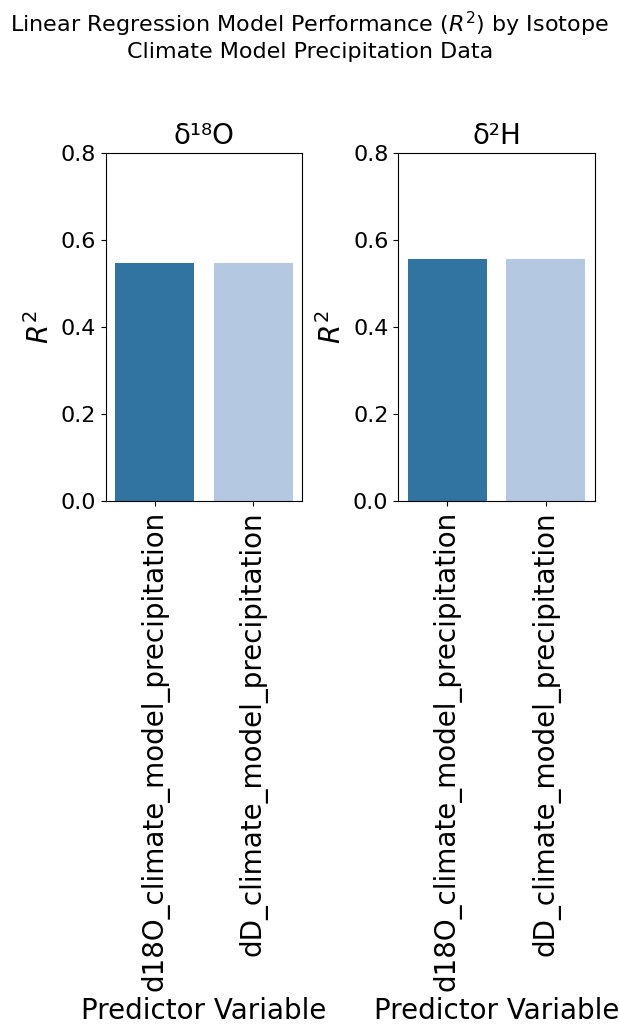

In [18]:


# Map isotopes w good labels 
iso_labels = {
    'd18O': 'δ¹⁸O',
    'd2H': 'δ²H',
   # 'd13C': 'δ¹³C',
  #  'd34S': 'δ³⁴S', 

}

# Define a consistent color palette for all variables
unique_vars = top_r2_table_eric['Variable'].unique()
palette = sns.color_palette('tab20', n_colors=len(unique_vars))
var_color_map = dict(zip(unique_vars, palette))

# Set up plot
fig, axes = plt.subplots(1, 2, figsize=(6, 10), sharey=False)
axes = axes.flatten()

# Get unique isotopes
isotopes = ['d18O', 'd2H' ]

# Plot each isotope
for i, iso in enumerate(isotopes):
    data = top_r2_table_eric[top_r2_table_eric['Isotope'] == iso]
    sns.barplot(
        data=data,
        x='Variable',
        y='R2',
        palette=[var_color_map[v] for v in data['Variable']],
        ax=axes[i]
    )
    axes[i].set_ylim(0,0.8)
    axes[i].set_title(f'{iso_labels[iso]}', fontsize=20)
    axes[i].set_xlabel('Predictor Variable', fontsize=20)
    axes[i].set_ylabel('$R^2$', fontsize=20)
    axes[i].tick_params(axis='x', rotation=90, labelsize=20)
    axes[i].tick_params(axis='y', labelsize=16)

# Add overall title
plt.suptitle("Linear Regression Model Performance ($R^2$) by Isotope \nClimate Model Precipitation Data", fontsize=16, y=1.03)

# Final layout
plt.tight_layout()
plt.show()


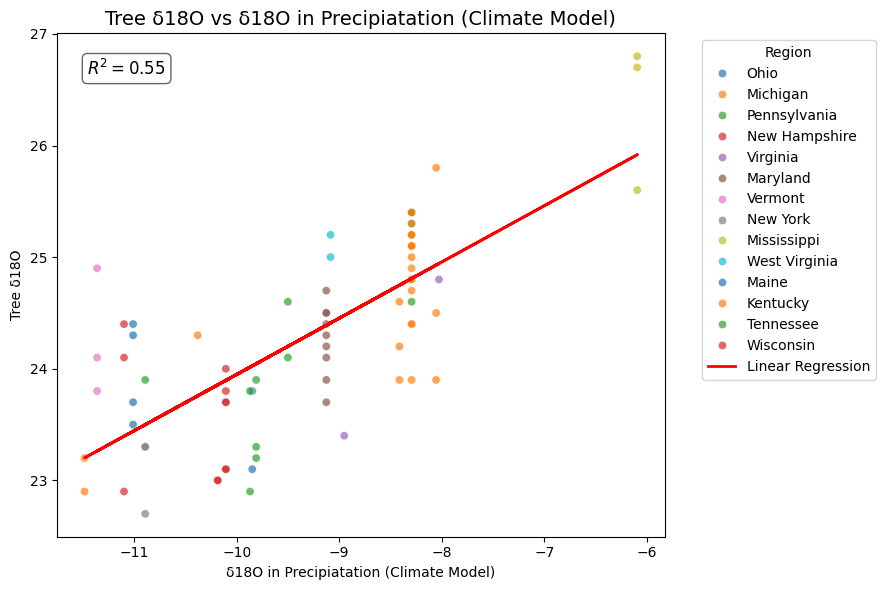

In [20]:



col = 'd18O'
region_col = 'Region'  
df_sub = tree[['d18O_climate_model_precipitation', col, 'Region',]].dropna()


# Fit regression
X = df_sub[['d18O_climate_model_precipitation']]
y = df_sub[[col]]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(9,6))

sns.scatterplot(
    x='d18O_climate_model_precipitation',
    y=col,
    hue=region_col,
    data=df_sub,
    palette='tab10',
    alpha=0.7,
    ax=ax
)

# Regression line
ax.plot(X, y_pred, color='red', lw=2, label='Linear Regression')

# Annotate R²
ax.text(
    0.05, 0.95, f"$R^2 = {r2:.2f}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
)

# Labels and legend
ax.set_title(f"Tree δ18O vs δ18O in Precipiatation (Climate Model)", fontsize=14)
ax.set_xlabel("δ18O in Precipiatation (Climate Model)")
ax.set_ylabel("Tree δ18O")
ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


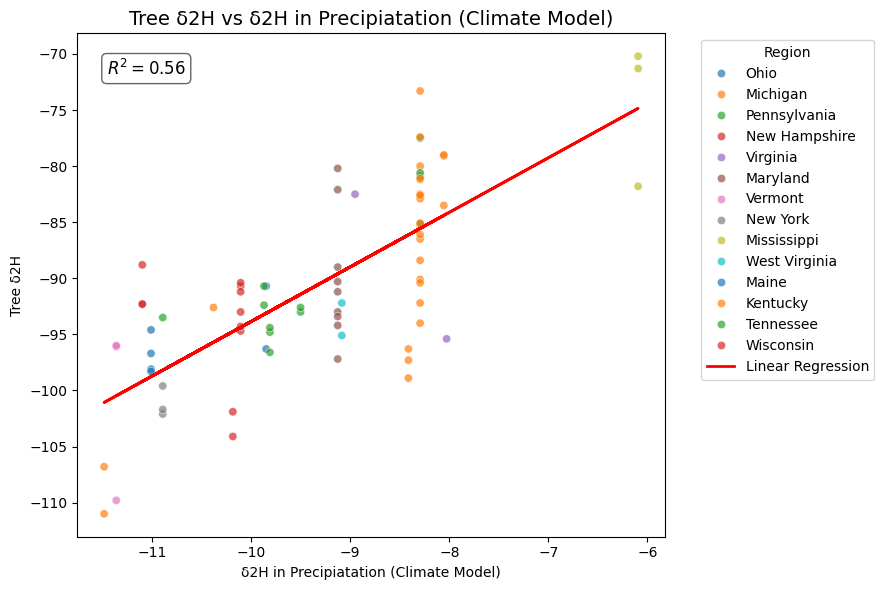

In [21]:
col = 'd2H'
region_col = 'Region'  
df_sub = tree[['dD_climate_model_precipitation', col, 'Region',]].dropna()

# Fit regression
X = df_sub[['dD_climate_model_precipitation']]
y = df_sub[[col]]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(9,6))

# Scatter colored by region
sns.scatterplot(
    x='dD_climate_model_precipitation',
    y=col,
    hue=region_col,
    data=df_sub,
    palette='tab10',
    alpha=0.7,
    ax=ax
)

# Regression line
ax.plot(X, y_pred, color='red', lw=2, label='Linear Regression')

# Annotate R²
ax.text(
    0.05, 0.95, f"$R^2 = {r2:.2f}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
)

# Labels and legend
ax.set_title(f"Tree δ2H vs δ2H in Precipiatation (Climate Model)", fontsize=14)
ax.set_xlabel("δ2H in Precipiatation (Climate Model)")
ax.set_ylabel("Tree δ2H")
ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [214]:
#create a plot that looks at tree diameter and respective isotope measurements

col = ['d18O']


df_sub = tree[['d18O_climate_model_precipitation', 'd18O']].dropna()
X = df_sub[['d18O_climate_model_precipitation']]
y = df_sub[['d18O']]
    
# Fit regression
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
    
# Scatter plot
sns.scatterplot(x='d18O_climate_model_precipitation', y='d18O', data=df_sub, ax=ax, alpha=0.7)
    
    # Regression line
ax.plot(X, y_pred, color='red')
    
    # Annotate R²
ax.text(0.05, 0.95, f"$R^2 = {r2:.2f}$", 
            transform=ax.transAxes, 
            fontsize=12, 
            verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6))
    
ax.set_title(f"{col} vs d18O_eric ")
plt.show()



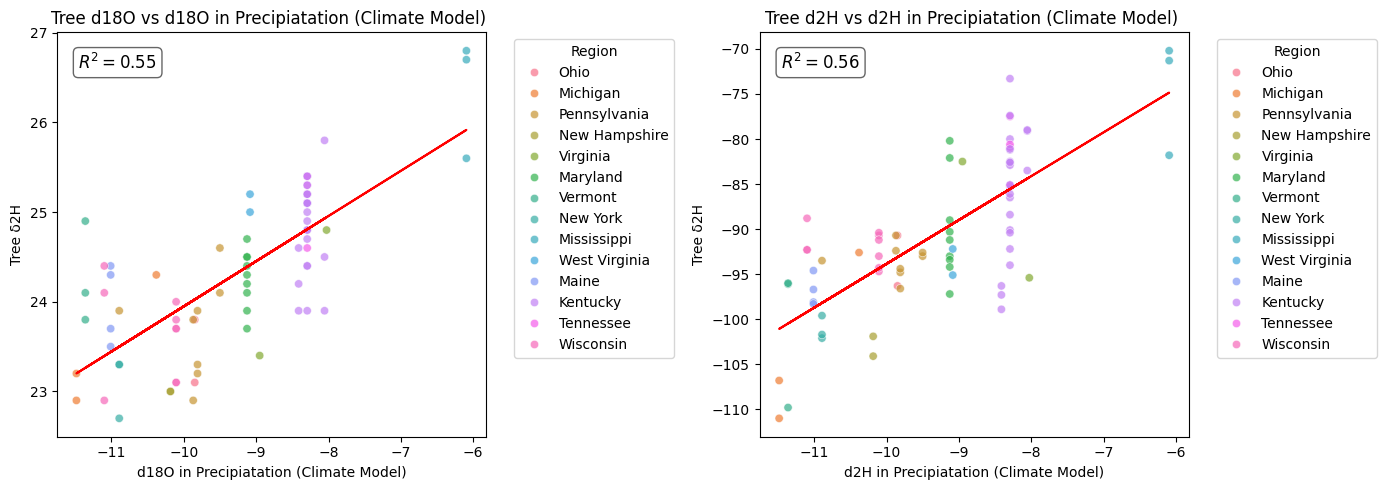

In [22]:
#create a plot that looks at tree diameter and respective isotope measurements

cols = ['d18O', 'd2H']

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

for ax, col in zip(axes.flatten(), cols):

    df_sub = tree[['dD_climate_model_precipitation','d18O', 'd2H', 'd18O_climate_model_precipitation', 'Region',]].dropna()
    X = df_sub[['d18O_climate_model_precipitation']]
    y = df_sub[col]
    
    # Fit regression
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Scatter plot
    sns.scatterplot(x='d18O_climate_model_precipitation', y=col, 
                    data=df_sub, 
                    hue=region_col,
                    ax=ax, alpha=0.7)
    
    # Regression line
    ax.plot(X, y_pred, color='red')
    
    # Annotate R²
    ax.text(0.05, 0.95, f"$R^2 = {r2:.2f}$", 
            transform=ax.transAxes, 
            fontsize=12, 
            verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6))
    
    ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_xlabel(f"{col} in Precipiatation (Climate Model)")
    ax.set_ylabel("Tree δ2H")
    ax.set_title(f"Tree {col} vs {col} in Precipiatation (Climate Model) ")

plt.tight_layout()
plt.show()


In [24]:
!ls

Modeling_w_spatial_cv.ipynb
Modeling_w_spatial_cv_and_isoscapes.ipynb
Newest_dataset_analysis_python.ipynb
Tree_ds_sep16.csv
Tree_loss_year_500m.tif
add_eric_data.ipynb
environment.yml
explore_variation_among_same_location.ipynb
spatial_auto_tests.ipynb
tree_loss_overlay.png
tree_loss_plot.ipynb
usa.geojson


In [26]:
list(tree.columns)


#tree.to_csv('Tree_ds_oct20.csv', index=False) 

['tree_id',
 'Region',
 'Latitude',
 'Longitude',
 'geometry',
 'Species',
 'Date collected',
 'Type of sample',
 'Height of sample',
 'Diameter of tree at sample location (inches)',
 'd18O',
 'd2H',
 'd13C',
 'd34S',
 'aspect',
 'elevation_dem',
 'slope',
 'dist_to_ocean_m',
 'dist_to_coalplant_m',
 'HAND',
 'NDMI_Fall_L8',
 'NDMI_Spring_L8',
 'NDMI_Summer_L8',
 'NDMI_Winter_L8',
 'NDSI_Fall_L8',
 'NDSI_Spring_L8',
 'NDSI_Summer_L8',
 'NDSI_Winter_L8',
 'NDVI_Fall_L8',
 'NDVI_Spring_L8',
 'NDVI_Summer_L8',
 'NDVI_Winter_L8',
 'NDWI_Fall_L8',
 'NDWI_Spring_L8',
 'NDWI_Summer_L8',
 'NDWI_Winter_L8',
 'SAVI_Fall_L8',
 'SAVI_Spring_L8',
 'SAVI_Summer_L8',
 'SAVI_Winter_L8',
 'SR_B1_Fall_L8',
 'SR_B1_Spring_L8',
 'SR_B1_Summer_L8',
 'SR_B1_Winter_L8',
 'SR_B2_Fall_L8',
 'SR_B2_Spring_L8',
 'SR_B2_Summer_L8',
 'SR_B2_Winter_L8',
 'SR_B3_Fall_L8',
 'SR_B3_Spring_L8',
 'SR_B3_Summer_L8',
 'SR_B3_Winter_L8',
 'SR_B4_Fall_L8',
 'SR_B4_Spring_L8',
 'SR_B4_Summer_L8',
 'SR_B4_Winter_L8',
 'SR_B5_

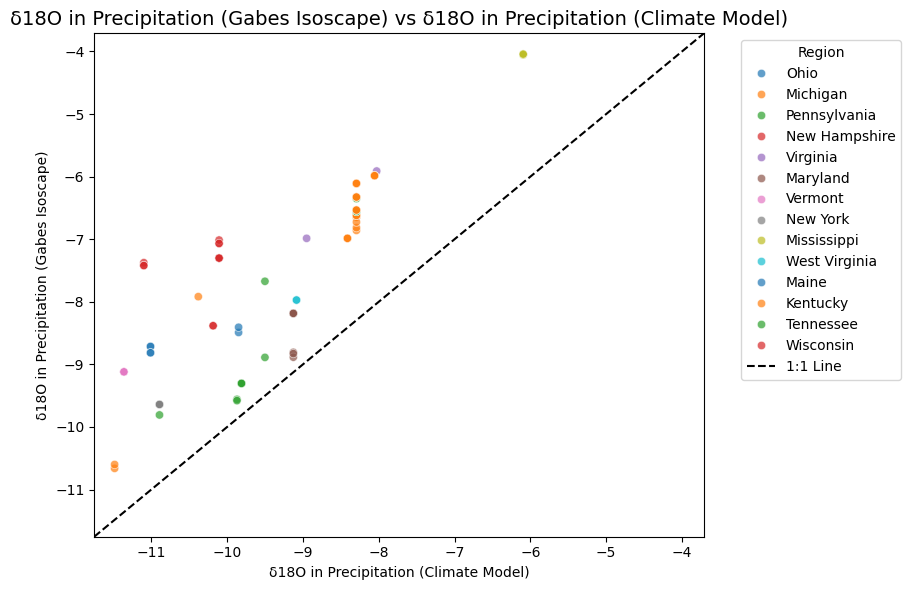

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

region_col = 'Region'
df_sub = tree[['d18O_climate_model_precipitation', 'precipitation_isoscape_annual_d18O', region_col]].dropna()

# Fit regression
X = df_sub[['d18O_climate_model_precipitation']]
y = df_sub[['precipitation_isoscape_annual_d18O']]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(9,6))

# Scatter colored by region
sns.scatterplot(
    x='d18O_climate_model_precipitation',
    y='precipitation_isoscape_annual_d18O',
    hue=region_col,
    data=df_sub,
    palette='tab10',
    alpha=0.7,
    ax=ax
)

# Regression line
#ax.plot(X, y_pred, color='red', lw=2, label='Linear Regression')

# 1:1 line (identity line)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()])   # max of both axes
]
ax.plot(lims, lims, '--', color='black', lw=1.5, label='1:1 Line')

# Adjust limits so the 1:1 line spans entire plot
ax.set_xlim(lims)
ax.set_ylim(lims)

# Annotate R²
#ax.text(
#    0.05, 0.95, f"$R^2 = {r2:.2f}$",
#    transform=ax.transAxes,
#    fontsize=12,
#    verticalalignment='top',
#    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
#)

# Labels and legend
ax.set_title("δ18O in Precipitation (Gabes Isoscape) vs δ18O in Precipitation (Climate Model)", fontsize=14)
ax.set_xlabel("δ18O in Precipitation (Climate Model)")
ax.set_ylabel("δ18O in Precipitation (Gabes Isoscape)")
ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [37]:
df_sub 

,d18O_climate_model_precipitation,precipitation_isoscape_annual_d18O,Region
0,-9.848774,-8.489942,Ohio
1,-10.380209,-7.917830,Michigan
2,-9.501338,-7.672455,Pennsylvania
3,-9.501338,-8.888357,Pennsylvania
4,-11.484205,-10.661341,Michigan
...,...,...,...
73,-8.294523,-6.534496,Kentucky
74,-8.294523,-6.534496,Kentucky
75,-11.098862,-7.374951,Wisconsin
76,-11.098862,-7.421059,Wisconsin


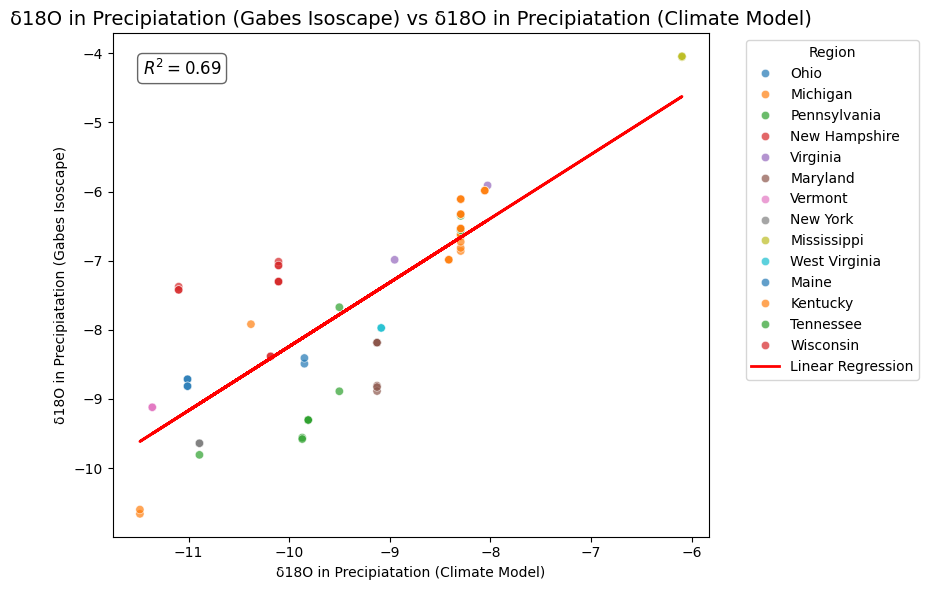

In [32]:

region_col = 'Region'  
df_sub = tree[['d18O_climate_model_precipitation', 'precipitation_isoscape_annual_d18O', 'Region',]].dropna()

# Fit regression
X = df_sub[['d18O_climate_model_precipitation']]
y = df_sub[['precipitation_isoscape_annual_d18O']]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(9,6))

# Scatter colored by region
sns.scatterplot(
    x='d18O_climate_model_precipitation',
    y='precipitation_isoscape_annual_d18O',
    hue=region_col,
    data=df_sub,
    palette='tab10',
    alpha=0.7,
    ax=ax
)

# Regression line
ax.plot(X, y_pred, color='red', lw=2, label='Linear Regression')

# Annotate R²
ax.text(
    0.05, 0.95, f"$R^2 = {r2:.2f}$",
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6)
)

# Labels and legend
ax.set_title(f"δ18O in Precipiatation (Gabes Isoscape) vs δ18O in Precipiatation (Climate Model)", fontsize=14)
ax.set_xlabel("δ18O in Precipiatation (Climate Model)")
ax.set_ylabel("δ18O in Precipiatation (Gabes Isoscape)")
ax.legend(title=region_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
